In [1]:
%matplotlib widget

import os
from tqdm import tqdm
import random 

inf=float("inf")
import numpy as np
import pandas as pd
import scipy as sp
import math as m

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import stablerank.srank as sr
import fMRIanalysis.data as data

from scipy.cluster import hierarchy

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import DBSCAN
import umap

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True

fig_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "\\Report\\Images\\Python\\"
fig_path

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



'C:\\Users\\naomi\\OneDrive\\Documenten\\COSSE\\Courses\\MSc year 2\\Thesis\\Report\\Images\\Python\\'

In [2]:
method = "dtw"
symmetrization = None
neg_vals_method = None
cor_to_dist_func = None
transform = None
mid = 1
connectivity_density = 1

In [3]:
dist_mats = {}
for subject in data.train_subjects_noctr:
    dist_mat = data.DistanceMatrix(subject,
                                     cohort="PD",
                                     method=method,
                                     symmetrization=symmetrization,
                                     neg_vals_method=neg_vals_method, 
                                     cor_to_dist_func=cor_to_dist_func, 
                                     transform=transform,
                                     mid=mid,
                                     connectivity_density=connectivity_density).dist_mat
    
    dist_mats[subject] = dist_mat

In [4]:
hsrs_H0 = data.f_global(dist_mats, "H0_single")
hsrs_H1 = data.f_global(dist_mats, "H1")

# Divide by average sr

In [5]:
H0_total = sr.Pcnif([[0, 1], [0, 0]])
H1_total = sr.Pcnif([[0, 1], [0, 0]])
for label, hsr in hsrs_H0.items():
    H0_total += hsr
    H1_total += hsrs_H1[label]
H0_average = H0_total / len(hsrs_H0.keys())
H1_average = H1_total / len(hsrs_H1.keys())

Text(0, 0.5, '$|\\{i \\mid C(a_i, t) < b_i \\}|$')

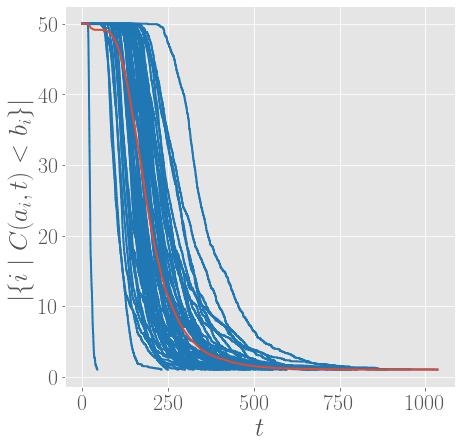

In [6]:
plt.figure()
#plt.title("Connectivity density: "+str(np.round(connectivity_density,2)), fontsize = 18)
for label, hsr in hsrs_H0.items():
    hsr.plot(color = "tab:blue")
H0_average.plot()
plt.xlabel('$t$')
plt.ylabel('$|\{i \mid C(a_i, t) < b_i \}|$')
#plt.legend()
#plt.savefig(fig_path+"Thresholding_allSubjects_density"+str(100*np.round(connectivity_density,2))+".jpg", bbox_inches="tight")

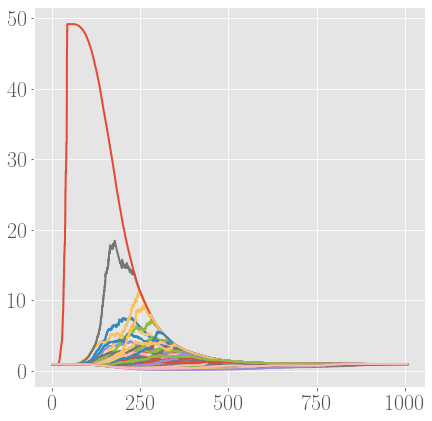

In [8]:
import warnings
warnings.filterwarnings('ignore')

for label, hsr in hsrs_H0.items():
    div = hsr.__rtruediv__(H0_average)
    div.plot()

Text(0, 0.5, '$|\\{i \\mid C(a_i, t) < b_i \\}|$')

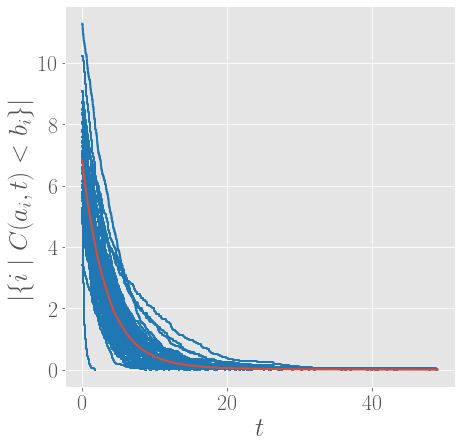

In [18]:
plt.figure()
#plt.title("Connectivity density: "+str(np.round(connectivity_density,2)), fontsize = 18)
for label, hsr in hsrs_H1.items():
    hsr.plot(color = "tab:blue")
H1_average.plot()
plt.xlabel('$t$')
plt.ylabel('$|\{i \mid C(a_i, t) < b_i \}|$')
#plt.legend()
#plt.savefig(fig_path+"Thresholding_allSubjects_density"+str(100*np.round(connectivity_density,2))+".jpg", bbox_inches="tight")

(0.0, 50.0)

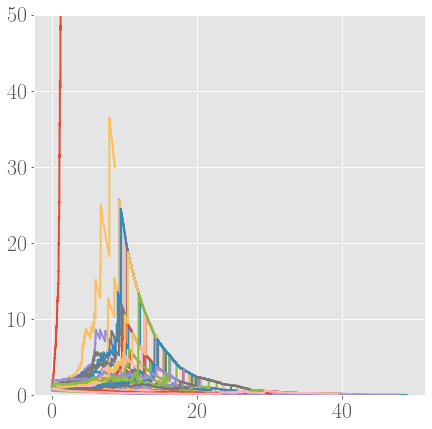

In [21]:
import warnings
warnings.filterwarnings('ignore')

for label, hsr in hsrs_H1.items():
    div = hsr.__rtruediv__(H1_average)
    div.plot()
plt.ylim(0, 50)

# Divide H1 by H0

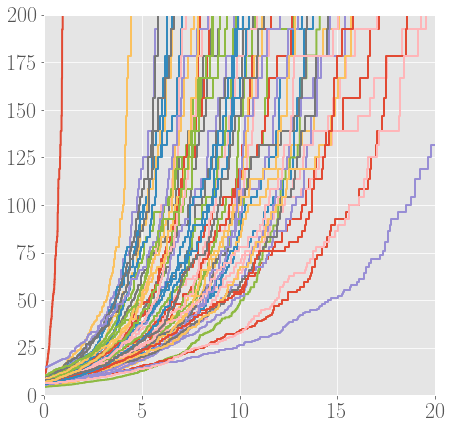

In [15]:
plt.figure()
for subject in data.train_subjects_noctr:
    div = hsrs_H1[subject].__rtruediv__(hsrs_H0[subject])
    div.plot()
plt.ylim(0, 200)
plt.xlim(0, 20)
plt.show()

# Integral of the sr

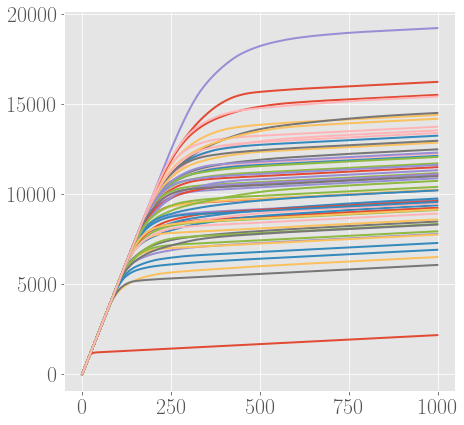

In [31]:
N = 1000
last = 1000
x = np.zeros(N)
for i in range(N):
    x[i] = i * last/N
    
integrated_H0 = dict()
for label, hsr in hsrs_H0.items():
    integrated_H0[label] = np.zeros(N)
    for i in range(N):
        integrated_H0[label][i] = hsr.integrate(start = 0, end = x[i])
    plt.plot(x, integrated_H0[label])

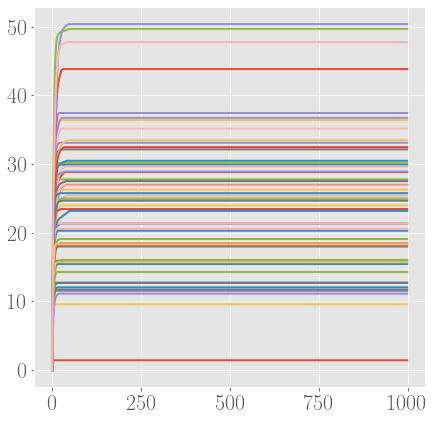

In [36]:
N = 1000
last = 1000
integrated = np.zeros(N)
x = np.zeros(N)
for i in range(N):
    x[i] = i * last/N
        
integrated_H1 = dict()
for label, hsr in hsrs_H1.items():
    integrated_H1[label] = np.zeros(N)
    for i in range(N):
        integrated_H1[label][i] = hsr.integrate(start = 0, end = x[i])
    plt.plot(x, integrated_H1[label])

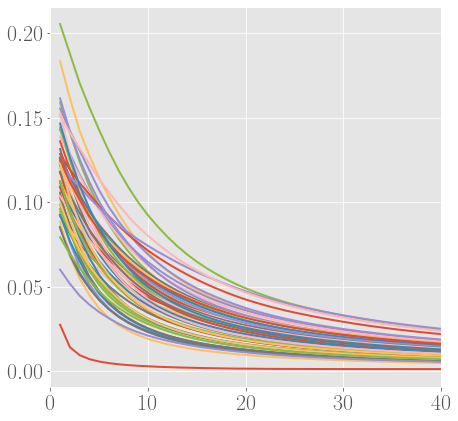

In [39]:
plt.figure()
for subject in data.train_subjects_noctr:
    div = integrated_H1[subject] / integrated_H0[subject]
    plt.plot(div)
#plt.ylim(0, 200)
plt.xlim(0, 40)
plt.show()

# Try out standard transformations

Text(0, 0.5, '$|\\{i \\mid C(a_i, t) < b_i \\}|$')

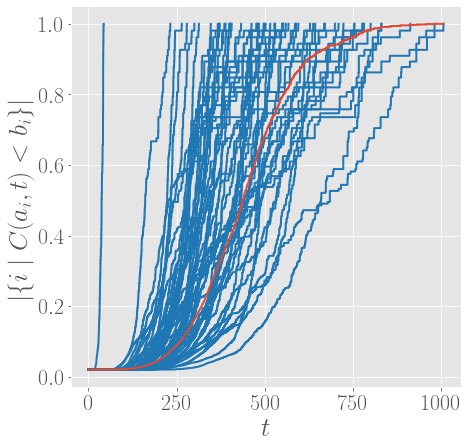

In [41]:
plt.figure()
#plt.title("Connectivity density: "+str(np.round(connectivity_density,2)), fontsize = 18)
for label, hsr in hsrs_H0.items():
    hsr.__pow__(-1).plot(color = "tab:blue")
H0_average.__pow__(-1).plot()
plt.xlabel('$t$')
plt.ylabel('$|\{i \mid C(a_i, t) < b_i \}|$')
#plt.legend()
#plt.savefig(fig_path+"Thresholding_allSubjects_density"+str(100*np.round(connectivity_density,2))+".jpg", bbox_inches="tight")

# Try different plotting methods

In [5]:
maxVal = 500
x = np.arange(0, maxVal, 1)
matrix = np.zeros((len(hsrs_H0.keys()), len(x) + 1))
i = 0
for subject, hsr in hsrs_H0.items():
    matrix[i, :-1] = hsr.evaluate(x)
    matrix[i, -1] = sum(matrix[i, :-1])
    i += 1
df_H0 = pd.DataFrame(matrix, index = hsrs_H0.keys())
df_H0 = df_H0.sort_values(by = len(x), ascending = False)
df_H0 = df_H0.drop(len(x), axis=1)
df_H0.columns = x

C:\Users\naomi\AppData\Local\Miniconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


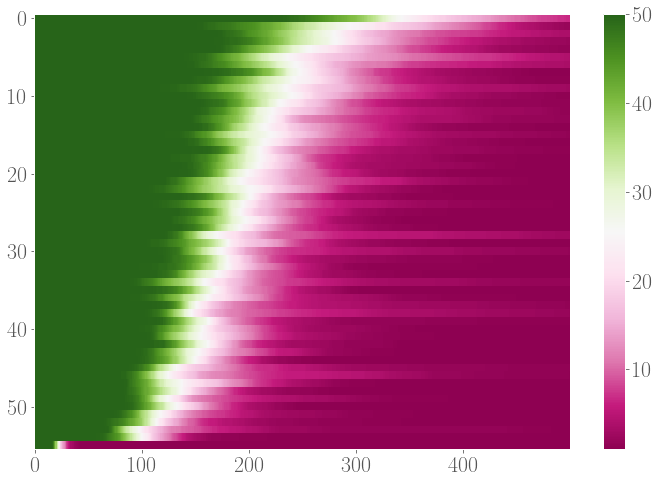

In [6]:
plt.figure(figsize = (12, 8))
plt.grid(False)
plt.imshow(df_H0, aspect='auto', interpolation='nearest', cmap = 'PiYG')
plt.colorbar()

In [7]:
len(hsrs_H0.keys())

56

In [8]:
maxVal = 40
x = np.arange(0, maxVal, 0.1)
matrix = np.zeros((len(hsrs_H1.keys()), len(x) + 1))
i = 0
for subject, hsr in hsrs_H1.items():
    matrix[i, :-1] = hsr.evaluate(x)
    matrix[i, -1] = sum(matrix[i, :-1])
    i += 1
df_H1 = pd.DataFrame(matrix)
df_H1 = df_H1.sort_values(by = len(x), ascending = False)
df_H1 = df_H1.drop(len(x), axis=1)
df_H1.columns = x

C:\Users\naomi\AppData\Local\Miniconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


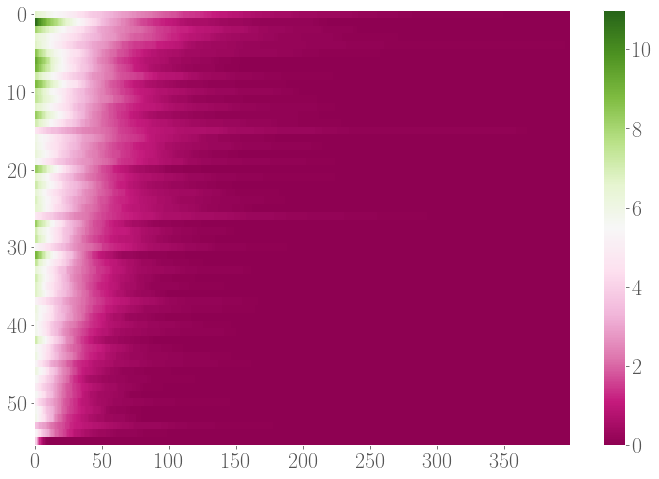

In [9]:
plt.figure(figsize = (12, 8))
plt.grid(False)
plt.imshow(df_H1, aspect='auto', interpolation='nearest', cmap = 'PiYG')
plt.colorbar()

# Simulated Annealing

In [27]:
#original one, with error in J_local probably
def simulated_annealing(X, Tinit, Tfinal, max_its, maxTconst, N, hsrs):
    
    Xopt = X.copy() #optimal permutation of X
    T = Tinit #current temperature
    history = dict()
    history['deltaJ'] = []
    history['pbound'] = []
    history['i'] = []
    history['total_J'] = []
    swaps = 0
    Xswaps = 0
    
    for it in tqdm(range(max_its)):
        for rep in range(maxTconst):
            deltaJ, i = J_loc(X, N, hsrs) 
            history['i'].append(i) #for debugging
            
            if deltaJ < 0: #if swapping proposed indices gives lower energy
                swap(X, i) #swap those indices
                pbound = 2 #for debugging
                Xswaps += 1 #for debugging
                
                total_J = J_glob(X, N, hsrs)
                history['total_J'].append(total_J)
                if total_J < J_glob(Xopt, N, hsrs): #if this energy is lower than the optimum so far
                    Xopt = X.copy() #candidate is new optimal
                    pbound = 3 #for debugging
                    swaps += 1 #for debugging
            else:
                if T == 0:
                    pbound = 0 #for debugging
                    deltaJ = 0 #for debugging
                else:
                    p = np.random.rand() #select random number between 0 and 1
                    pbound = np.exp(-deltaJ / T)
                    if p < pbound: #for large T, exp(...) is close to 1, so selecting Y is random; the smaller T gets, the lower exp(...) -> probability of chosing Y decreases
                        swap(X, i) #still take the new candidate
                        Xswaps += 1 #for debugging

            history['deltaJ'].append(deltaJ) #for debugging
            history['pbound'].append(pbound) #for debugging
        
        T = g(T) #lower temperature
        if T < Tfinal:
            T = 0
            
    return Xopt, history, swaps, Xswaps
   
def J_loc(X, N, hsrs):
    i = random.randint(0, len(X) - 2)
    deltaDist = 0
    for j in range(1, N + 1):
        try:
            deltaDist += (1/j - 1/(j+1)) * dist(X, i, i-j, hsrs)
            deltaDist += (1/(j+1) - 1/j) * dist(X, i+1, i-j, hsrs)
        except IndexError:
            break
    for j in range(1, N + 1):
        try:
            deltaDist += (1/(j+1) - 1/j) * dist(X, i, i+1+j, hsrs)
            deltaDist += (1/j - 1/(j+1)) * dist(X, i+1, i+1+j, hsrs)
        except IndexError:
            break
            
    return deltaDist, i

def J_glob(X, N, hsrs):
    total_dist = 0
    for i in range(len(X)):
        for j in range(1, N + 1):
            try:
                total_dist += (1/j) * dist(X, i, i-j, hsrs)
            except IndexError:
                break
        for j in range(1, N + 1):
            try:
                total_dist += (1/j) * dist(X, i, i+j, hsrs)
            except IndexError:
                break
    return total_dist

def dist(X, i1, i2, hsrs):
    return hsrs[X[i1]].lp_distance(hsrs[X[i2]], p = 2)

def swap(X, i):
    X[i], X[i+1] = X[i+1], X[i]

def g(T):
    power = 0.995
    return T**power

In [74]:
# correct but slow computation, only using J_global
def simulated_annealing(X, Tinit, Tfinal, max_its, maxTconst, N, hsrs):
    Xopt = X.copy() #optimal permutation of X
    Jopt = J_glob(Xopt, N, hsrs)
    
    T = Tinit #current temperature
    history = dict()
    history['deltaJ'] = []
    history['pbound'] = []
    history['i'] = []
    history['JX'] = []
    swaps = 0
    Xswaps = 0    
    
    for it in tqdm(range(max_its)):
        for rep in range(maxTconst):
            i = random.randint(0, len(X) - 2)
            Y = X.copy()
            swap(Y, i)
            
            JY = J_glob(Y, N, hsrs)
            JX = J_glob(X, N, hsrs) 
            deltaJ = JY - JX
            history['i'].append(i) #for debugging
            
            if deltaJ < 0: #if swapping proposed indices gives lower energy
                swap(X, i) #swap those indices
                JX = JY
                pbound = 2 #for debugging
                Xswaps += 1 #for debugging
                
                if JX < Jopt: #if this energy is lower than the optimum so far
                    Xopt = X.copy() #candidate is new optimal
                    Jopt = JX
                    pbound = 3 #for debugging
                    swaps += 1 #for debugging
            else:
                p = np.random.rand() #select random number between 0 and 1
                pbound = np.exp(-deltaJ / T)
                if p < pbound: #for large T, exp(...) is close to 1, so selecting Y is random; the smaller T gets, the lower exp(...) -> probability of chosing Y decreases
                    swap(X, i) #still take the new candidate
                    JX = JY
                    Xswaps += 1 #for debugging

            history['JX'].append(JX)
            history['deltaJ'].append(deltaJ) #for debugging
            history['pbound'].append(pbound) #for debugging
        
        T = g(T) #lower temperature
        if T < Tfinal:
            break
            
    return Xopt, history, swaps, Xswaps

def J_glob(X, N, hsrs):
    total_dist = 0
    for k in range(1, N+1):
        for j in range(k):
            for i in range(j, len(X) - k, k):
                total_dist += (1/k) * dist(X, i, i+k, hsrs)
    return total_dist

def dist(X, i1, i2, hsrs):
    return hsrs[X[i1]].lp_distance(hsrs[X[i2]], p = 2)

def swap(X, i):
    X[i], X[i+1] = X[i+1], X[i]

def g(T):
    power = 0.995
    return T**power

In [73]:
# minimizing number of pixels for which the pixel above it has a lower value.
def simulated_annealing(X, Tinit, Tfinal, max_its, maxTconst, df):
    
    Xopt = X.copy() #optimal permutation of X
    Jopt = J_glob(Xopt, df) # optimal energy
    T = Tinit #current temperature
    history = dict()
    history['deltaJ'] = []
    history['pbound'] = []
    history['Jopt'] = []
    swaps = 0
    Xswaps = 0
    
    for it in tqdm(range(max_its)):
        for rep in range(maxTconst):
            i = random.randint(1, len(X) - 3)
            deltaJ = J_loc(X, i, df) 
            
            if deltaJ < 0: #if swapping proposed indices gives lower energy
                swap(X, i) #swap those indices
                pbound = 2 #for debugging
                Xswaps += 1 #for debugging
                
                totalJ = J_glob(X, df)
                if totalJ < Jopt: #if this energy is lower than the optimum so far
                    Xopt = X.copy() #candidate is new optimal
                    Jopt = totalJ
                    pbound = 3 #for debugging
                    swaps += 1 #for debugging
            else:
                p = np.random.rand() #select random number between 0 and 1
                pbound = np.exp(-deltaJ / T)
                if p < pbound: #for large T, exp(...) is close to 1, so selecting Y is random; the smaller T gets, the lower exp(...) -> probability of chosing Y decreases
                    swap(X, i) #still take the new candidate
                    Xswaps += 1 #for debugging

            history['deltaJ'].append(deltaJ) #for debugging
            history['pbound'].append(pbound) #for debugging
            history['Jopt'].append(Jopt) #for debugging
        T = g(T) #lower temperature
        if T < Tfinal:
            break
            
    return Xopt, history, swaps, Xswaps

def J_loc(X, i, df): 
    i_imin1_dist = 0
    iplus1_i_dist = 0
    iplus2_iplus1_dist = 0
    iplus1_imin1_dist = 0
    i_iplus1_dist = 0
    iplus2_i_dist = 0
    
    nr_rows, nr_columns = df_H0.shape
    
    for j in df.columns.values:
        if df.loc[X[i], j] > df.loc[X[i-1], j]:
            i_imin1_dist += np.abs(df.loc[X[i], j] - df.loc[X[i-1], j])
        if df.loc[X[i+1], j] > df.loc[X[i], j]:
            iplus1_i_dist += np.abs(df.loc[X[i+1], j] - df.loc[X[i], j])
        if df.loc[X[i+2], j] > df.loc[X[i+1], j]:
            iplus2_iplus1_dist += np.abs(df.loc[X[i+2], j] - df.loc[X[i+1], j])
        if df.loc[X[i+1], j] > df.loc[X[i-1], j]:
            iplus1_imin1_dist += np.abs(df.loc[X[i+1], j] - df.loc[X[i-1], j])
        if df.loc[X[i], j] > df.loc[X[i+1], j]:
            i_iplus1_dist += np.abs(df.loc[X[i], j] - df.loc[X[i+1], j])
        if df.loc[X[i+2], j] > df.loc[X[i], j]:
            iplus2_i_dist += np.abs(df.loc[X[i+2], j] - df.loc[X[i], j])
    
    oldDist = i_imin1_dist + iplus1_i_dist + iplus2_iplus1_dist
    newDist = iplus1_imin1_dist + i_iplus1_dist + iplus2_i_dist
    
    return newDist - oldDist
            
def J_glob(X, df):
    total_dist = 0
    nr_rows, nr_columns = df.shape
    for i in range(1, nr_rows):
        for j in df.columns.values:
            if df.loc[X[i], j] > df.loc[X[i-1], j]:
                total_dist += np.abs(df.loc[X[i], j] - df.loc[X[i-1], j])
    return total_dist

def swap(X, i):
    X[i], X[i+1] = X[i+1], X[i]

def g(T):
    power = 0.995
    return T**power

In [69]:
X = df_H0.index.values.copy()

In [70]:
%%time
J_glob(X, df_H0)

Wall time: 572 ms


11068.740000000018

In [71]:
%%time
J_loc(X, 2, df_H0)

Wall time: 57 ms


270.10000000000014

1.047522441678472


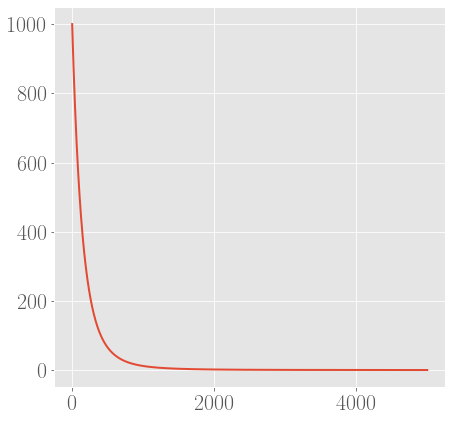

In [74]:
X = df_H0.index.values.copy()
Tinit = 1000
Tfinal = 1
max_its = 3000
maxTconst = 10
N = 2
hsrs = hsrs_H0

T = Tinit
T_list = list()
T_list.append(Tinit)
its = 0
for it in range(max_its):
    T = g(T) #lower temperature
    T_list.append(T)
    if T < Tfinal:
        print(it)
        break
print(T)
plt.figure()
plt.plot(T_list)
plt.show()

In [75]:
Xopt, history, swaps, Xswaps = simulated_annealing(X, Tinit, Tfinal, max_its, maxTconst, df_H0)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [51:41<00:00,  1.61it/s]


In [76]:
swaps

0

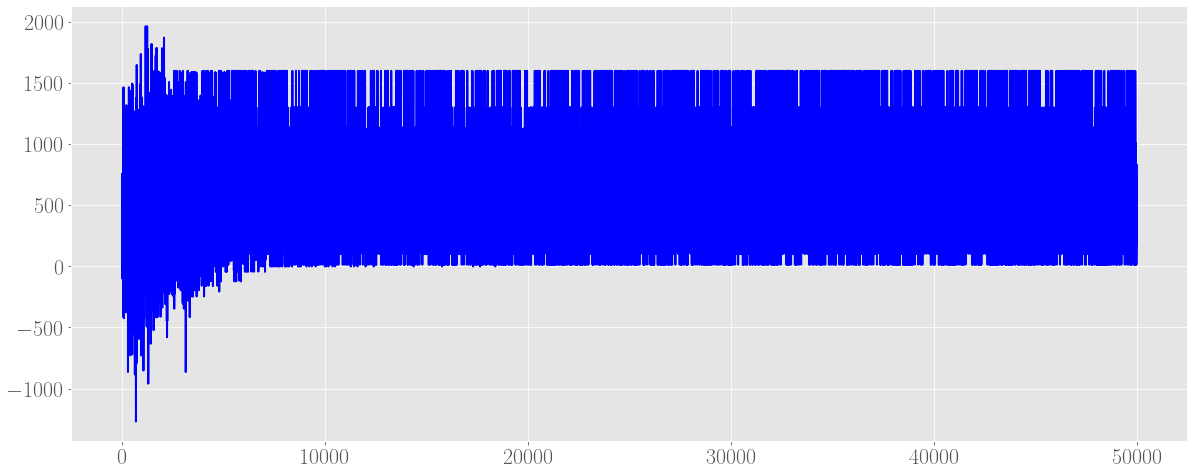

In [77]:
test = history['deltaJ'].copy()
plt.figure(figsize=(20, 8))
plt.plot(test, 'b')

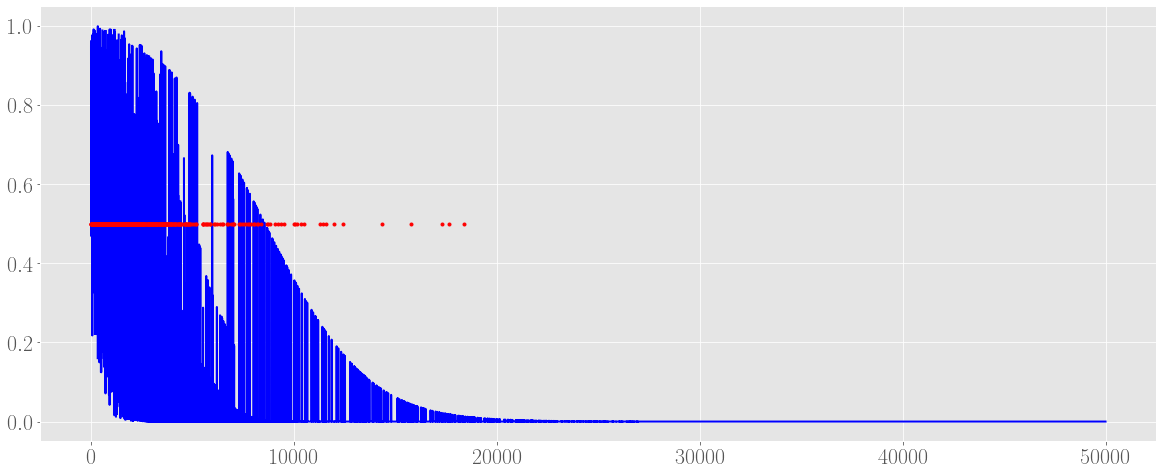

In [78]:
test = history['pbound'].copy()
plt.figure(figsize=(20, 8))
for i in range(len(test)):
    if test[i] == 2 or test[i] == 3:
        test[i] = np.nan
plt.plot(test, 'b')

test = history['pbound'].copy()
for i in range(len(test)):
    if test[i] > 1.9 and test[i] < 2.1:
        plt.plot(i, 0.5, '.r')
    if test[i] > 2.9 and test[i] < 3.1:
        plt.plot(i, 1.5, '.g')

In [79]:
maxVal = 500
x = np.arange(0, maxVal, 1)
matrix = np.zeros((len(hsrs_H0.keys()), len(x)))
i = 0
for subject in Xopt:
    matrix[i, :] = hsrs_H0[subject].evaluate(x)
    i += 1
opt_df_H0 = pd.DataFrame(matrix, index = Xopt)

C:\Users\naomi\AppData\Local\Miniconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


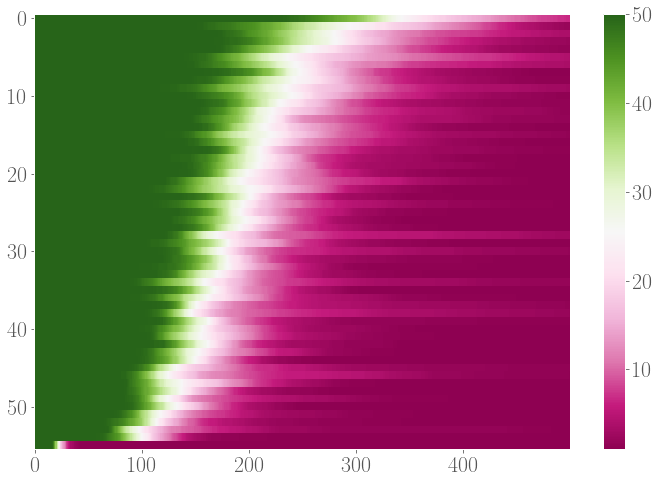

In [80]:
plt.figure(figsize = (12, 8))
plt.grid(False)
plt.imshow(df_H0, aspect='auto', interpolation='nearest', cmap = 'PiYG')
plt.colorbar()

C:\Users\naomi\AppData\Local\Miniconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


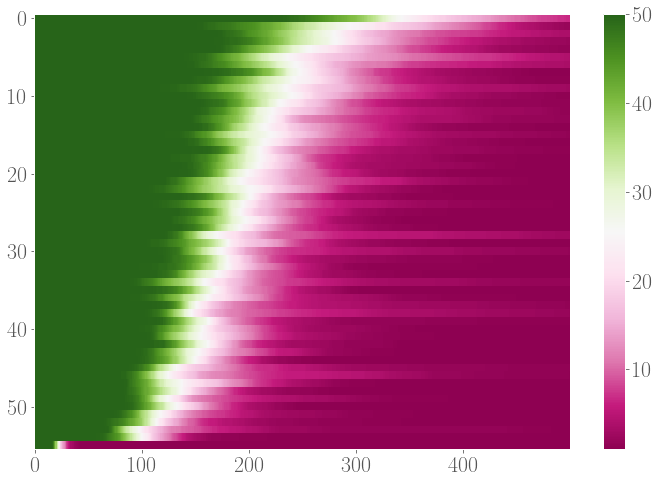

In [81]:
plt.figure(figsize = (12, 8))
plt.grid(False)
plt.imshow(opt_df_H0, aspect='auto', interpolation='nearest', cmap = 'PiYG')
plt.colorbar()

C:\Users\naomi\AppData\Local\Miniconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


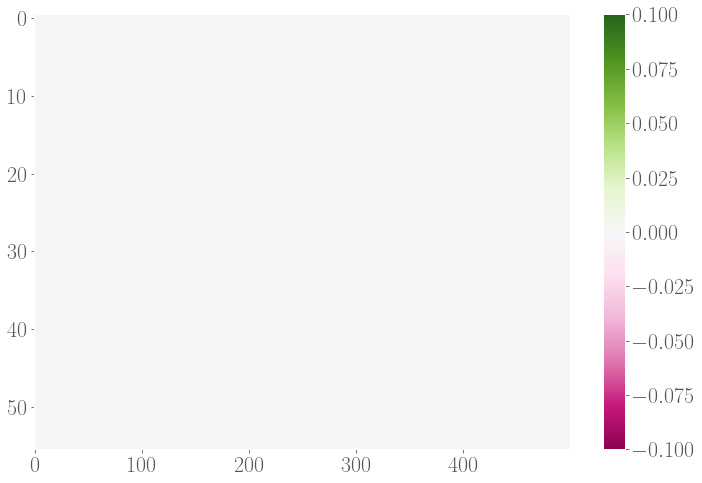

In [82]:
plt.figure(figsize = (12, 8))
plt.grid(False)
plt.imshow(opt_df_H0.to_numpy()-df_H0.to_numpy(), aspect='auto', interpolation='nearest', cmap = 'PiYG')
plt.colorbar()

In [83]:
maxVal = 500
x = np.arange(0, maxVal, 1)
matrix = np.zeros((len(hsrs_H0.keys()), len(x) + 1))
i = 0
for subject, hsr in hsrs_H0.items():
    matrix[i, :-1] = hsr.evaluate(x)
    matrix[i, -1] = sum(matrix[i, :-1])
    i += 1
df_H0 = pd.DataFrame(matrix, index = hsrs_H0.keys())
df_H0 = df_H0.sort_values(by = len(x), ascending = False)
df_H0 = df_H0.drop(len(x), axis=1)
df_H0.columns = x
X = df_H0.index.values.copy()

In [84]:
X

array([ 86,  18,  69, 106,  34,  64,  75,  57,  82,  36,  40,  72,  65,
        43,  61,  26,  29,  46,  51,  25,  27,  41,  94,  35,  92,  47,
       101,  71,  67, 105,  70,  44,  38,  30,  60,  93,  84,  68,  50,
        23,  49,  89, 104,  91,  88,  33,  87,  80,  56,  22,  55,  85,
        21,  24,  53,  58], dtype=int64)

In [85]:
Xopt

array([ 86,  18,  69, 106,  34,  64,  75,  57,  82,  36,  40,  72,  65,
        43,  61,  26,  29,  46,  51,  25,  27,  41,  94,  35,  92,  47,
       101,  71,  67, 105,  70,  44,  38,  30,  60,  93,  84,  68,  50,
        23,  49,  89, 104,  91,  88,  33,  87,  80,  56,  22,  55,  85,
        21,  24,  53,  58], dtype=int64)

In [86]:
print(J_glob(X, df_H0))
print(J_glob(Xopt, df_H0))

11068.740000000018
11068.740000000018


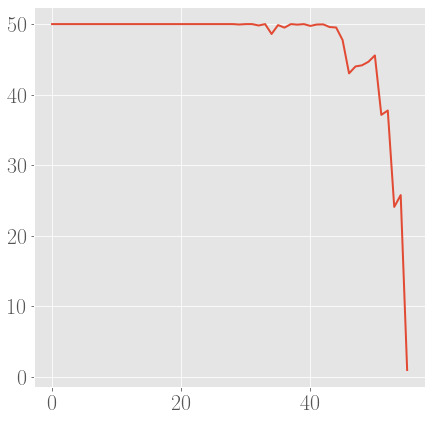

In [87]:
i = 100
plt.figure()
#for i in range(df_H0.shape[1]):
plt.plot(df_H0.iloc[:,i].values)

# Sorting per column

In [7]:
from matplotlib.widgets import Slider
from ipywidgets import interact

In [8]:
maxVal = 500
x = np.arange(0, maxVal, 1)
matrix = np.zeros((len(hsrs_H0.keys()), len(x)))
i = 0
j = 0
for subject, hsr in hsrs_H0.items():
    matrix[i, :] = hsr.evaluate(x)
    i += 1
df_H0 = pd.DataFrame(matrix, index = hsrs_H0.keys())

def sort_df(j, df):
    return df.sort_values(by = j, ascending = False)

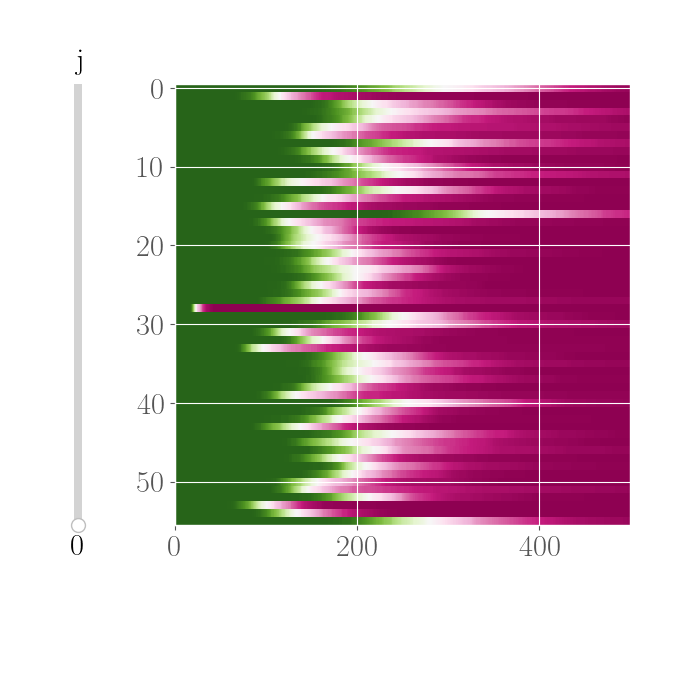

In [9]:
init_j = 0

fig, ax = plt.subplots()
image = plt.imshow(sort_df(j, df_H0), aspect='auto', interpolation='nearest', cmap = 'PiYG')
plt.subplots_adjust(left=0.25, bottom=0.25)

axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
j_slider = Slider(
    ax=axamp,
    label="j",
    valmin=0,
    valmax=len(x)-1,
    valinit=init_j,
    orientation="vertical"
)

def update(val):
    image.set_data(sort_df(j_slider.val, df_H0))
    fig.canvas.draw_idle()
    
j_slider.on_changed(update)

plt.show()

C:\Users\naomi\AppData\Local\Miniconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


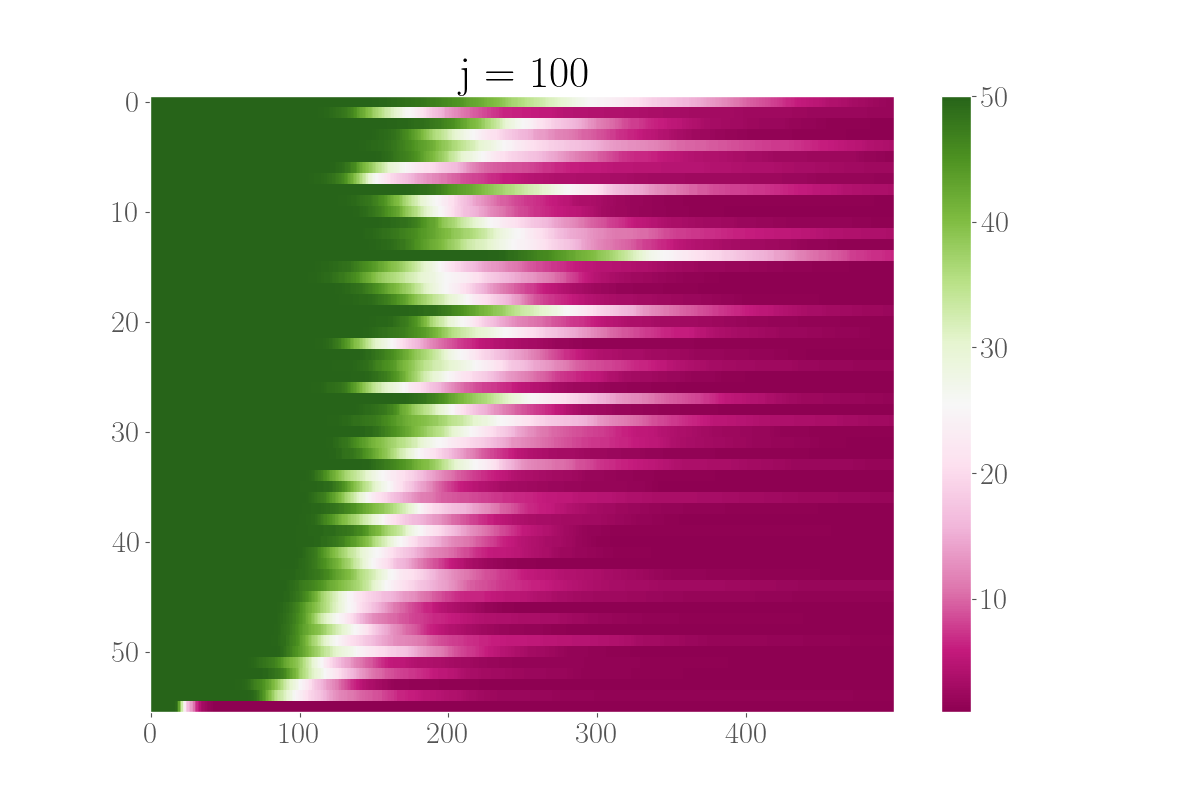

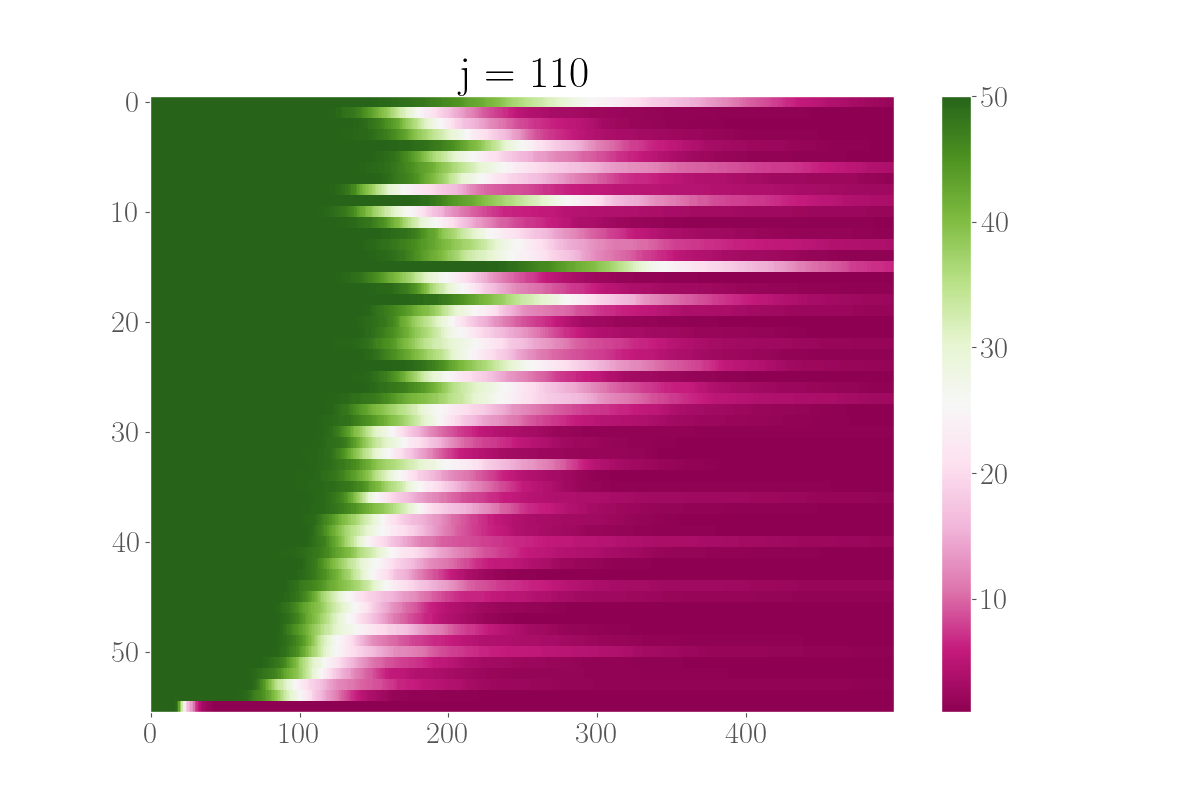

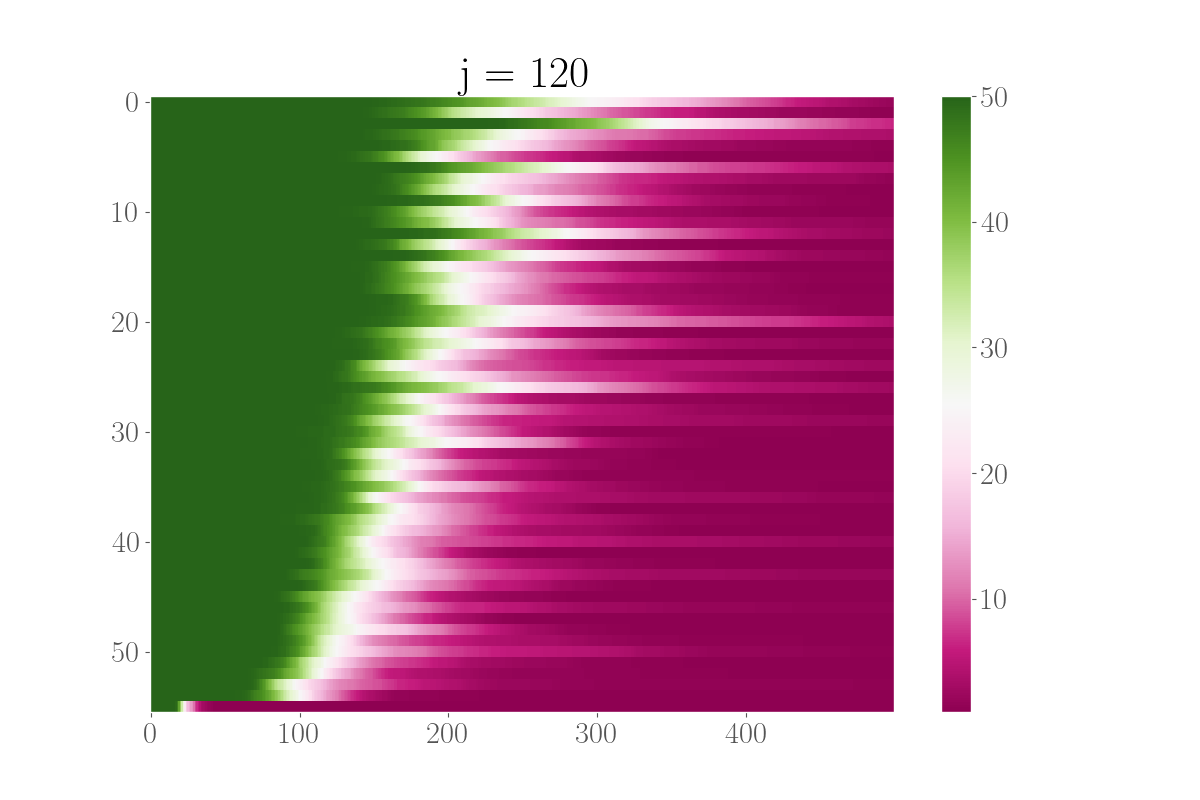

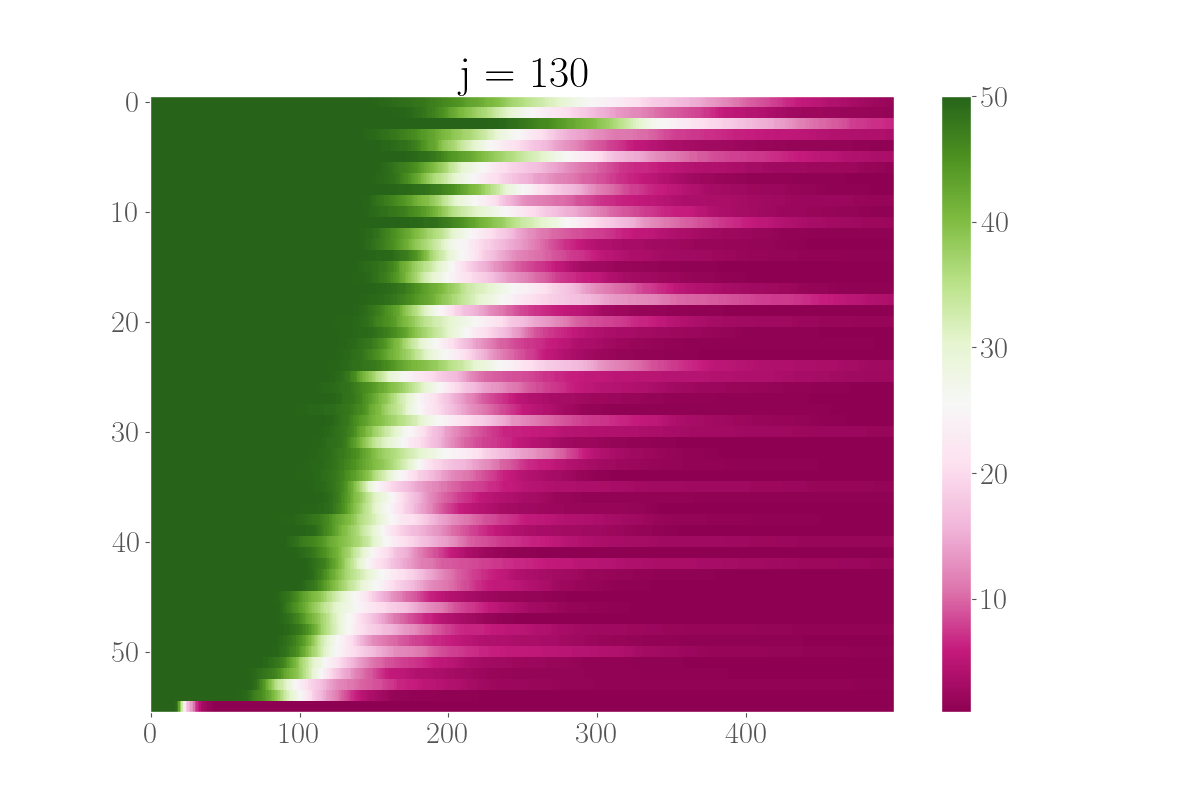

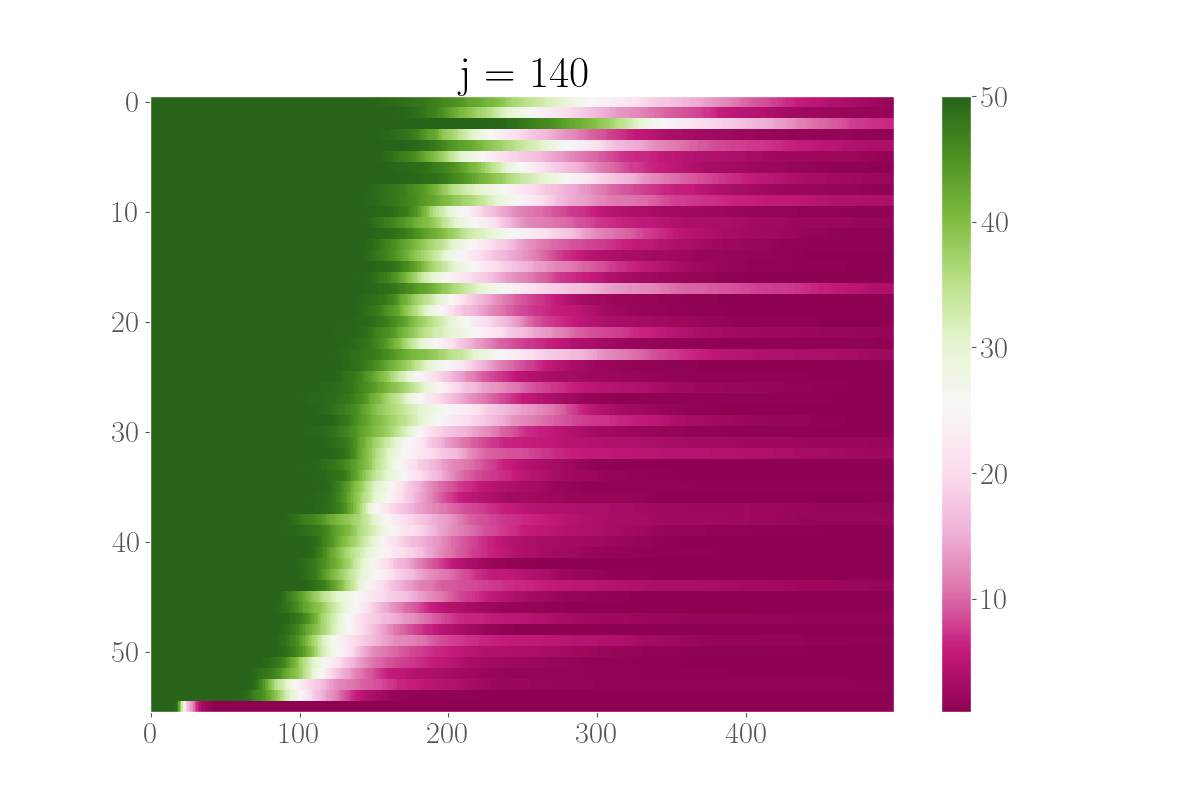

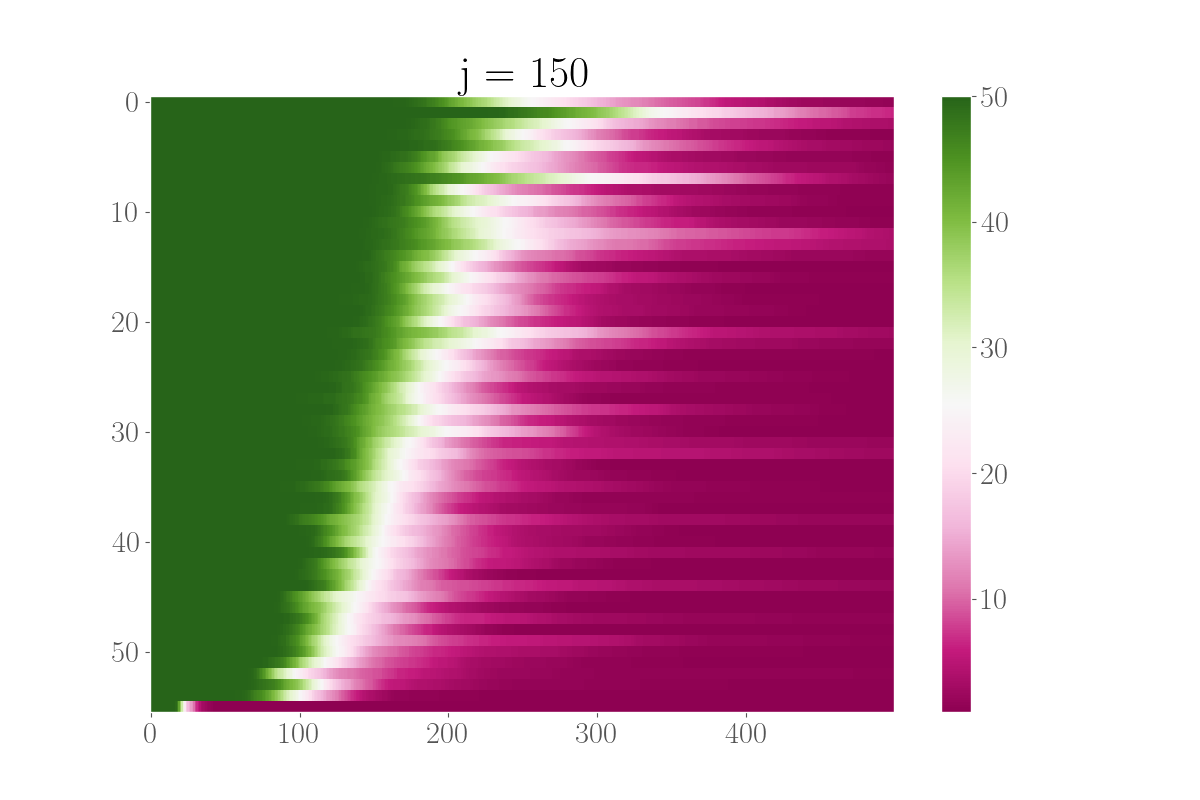

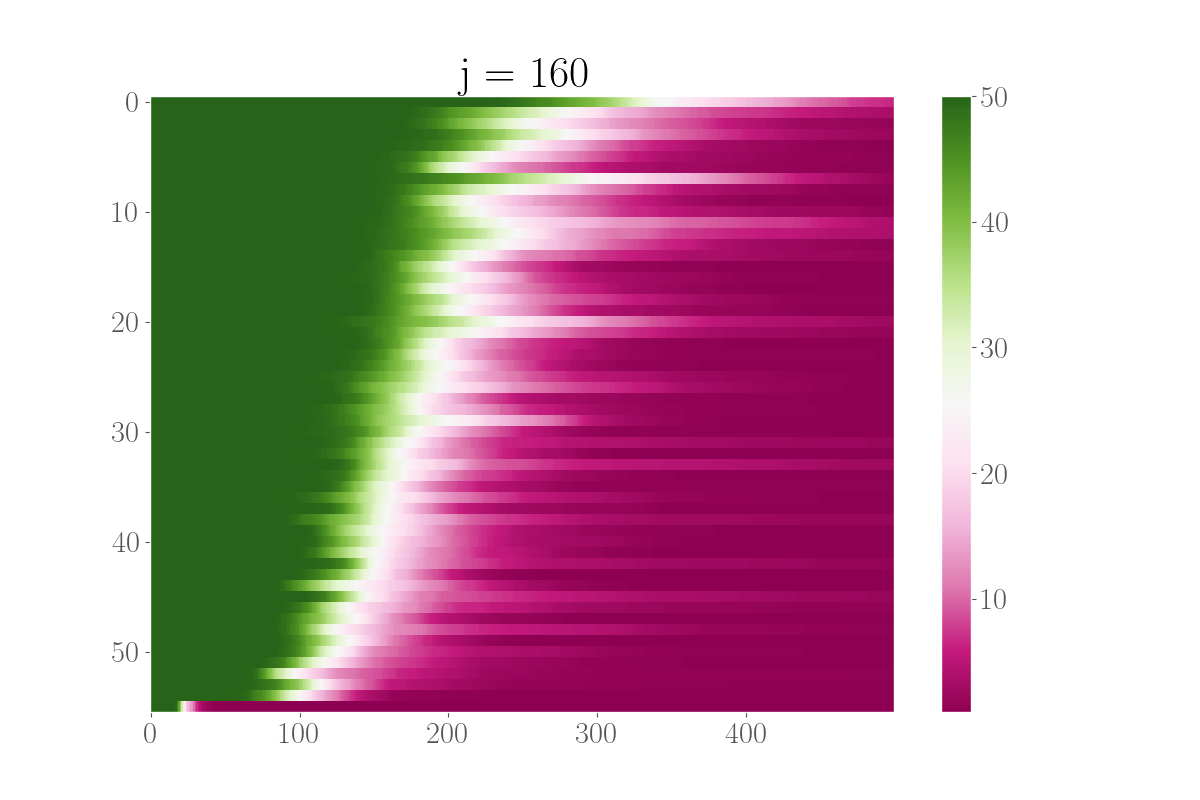

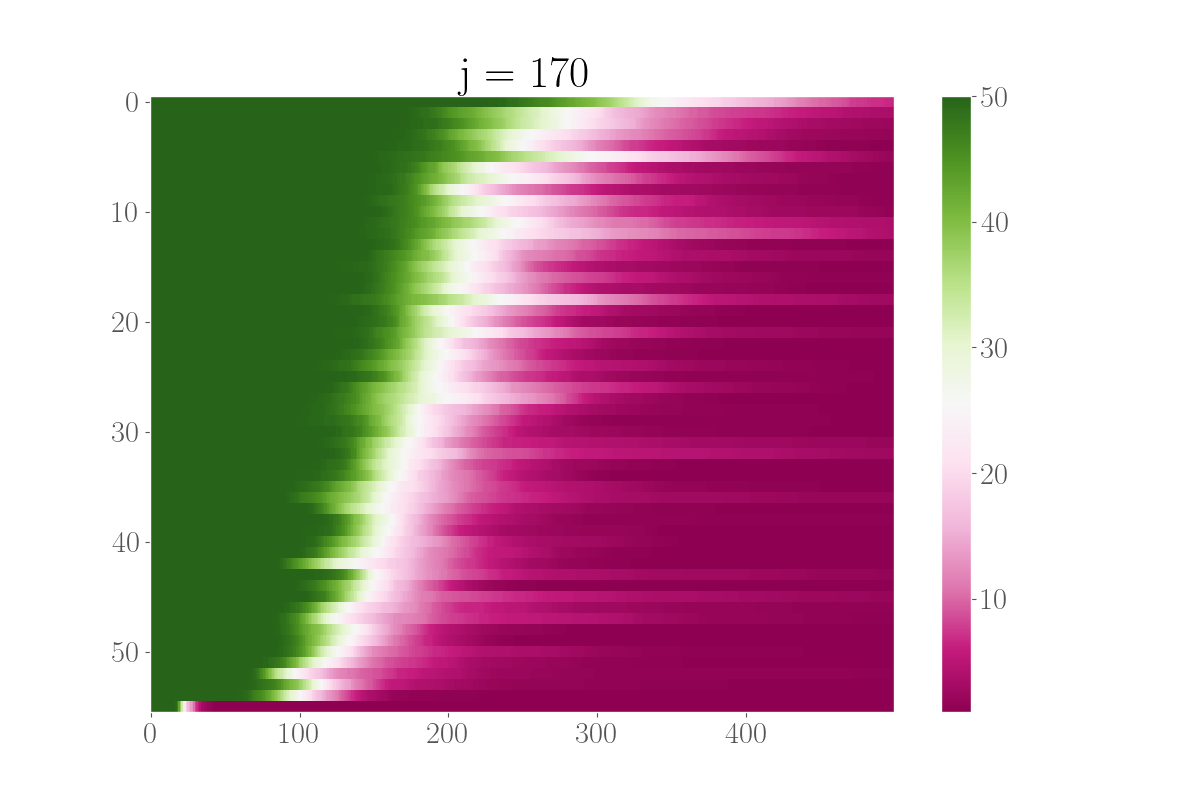

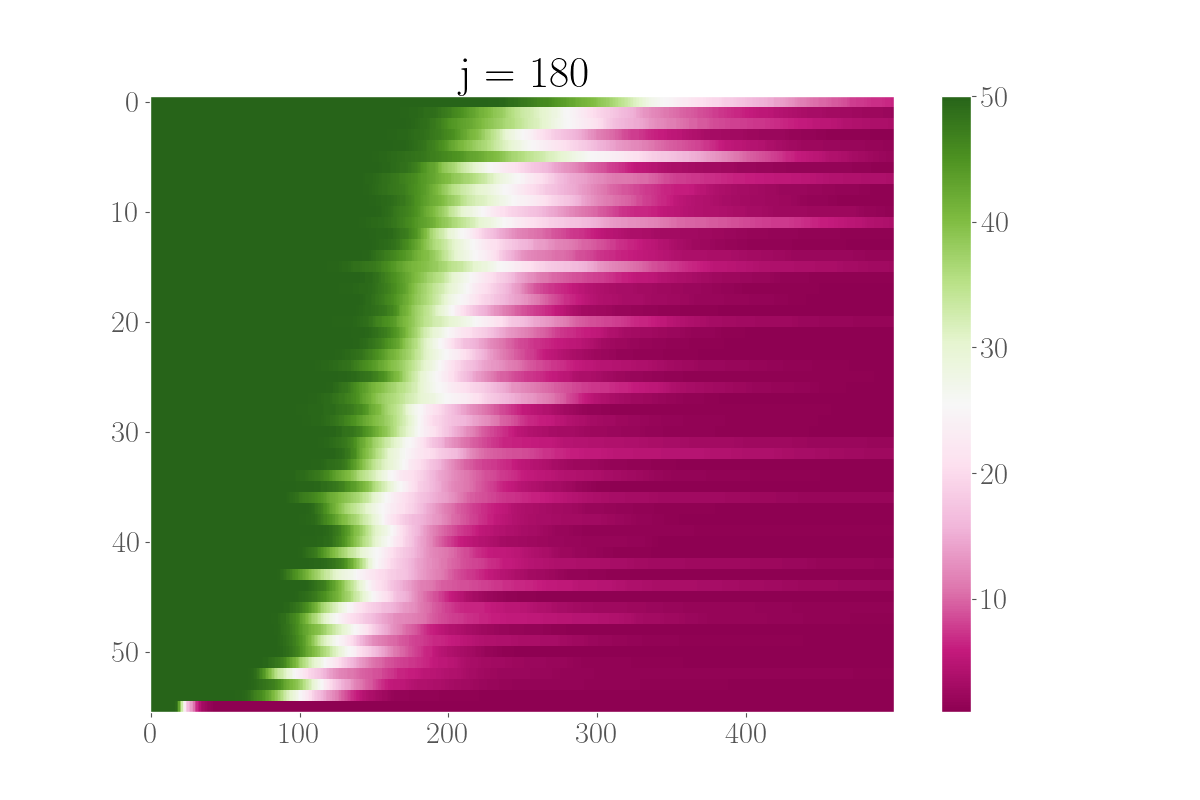

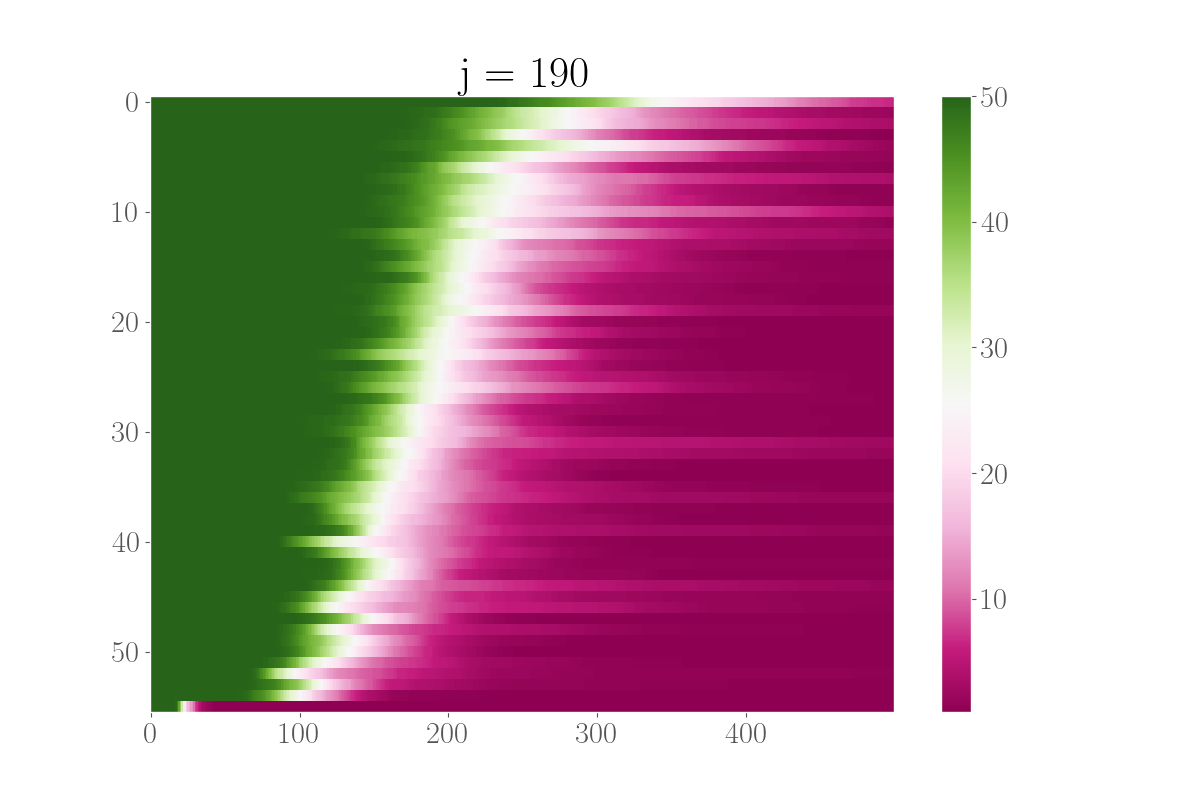

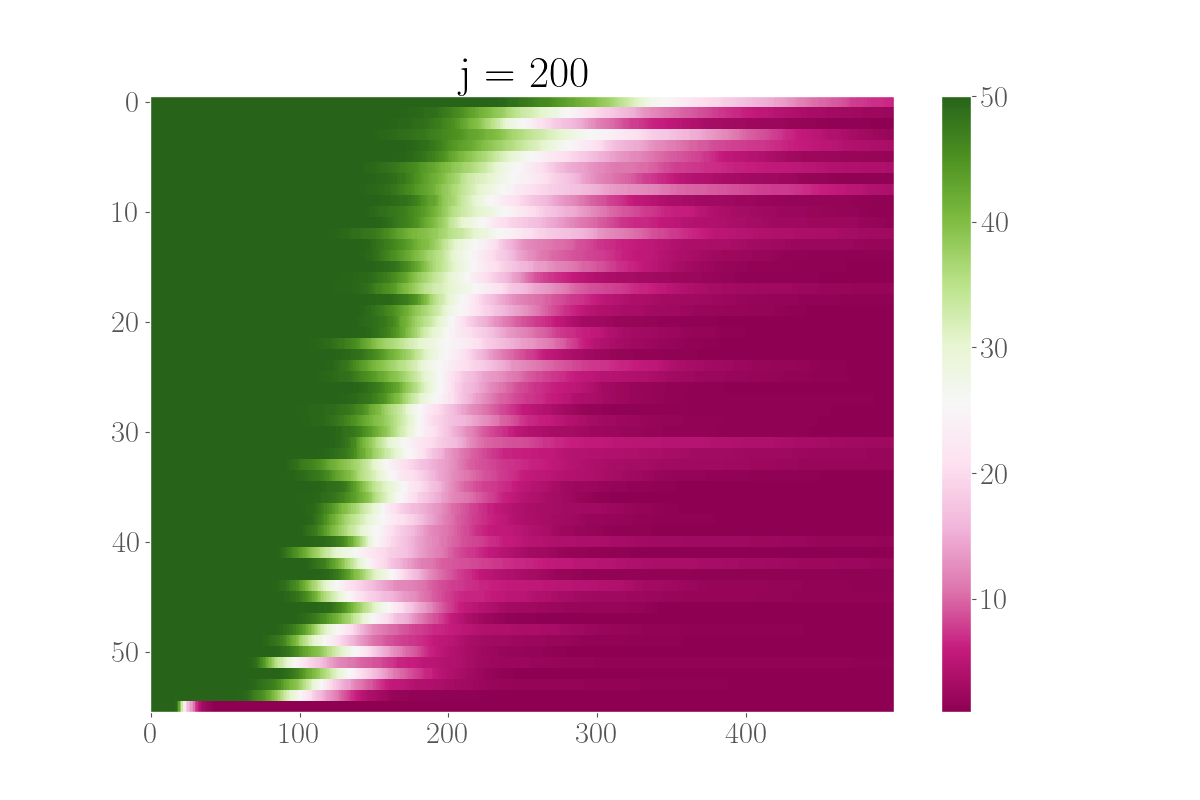

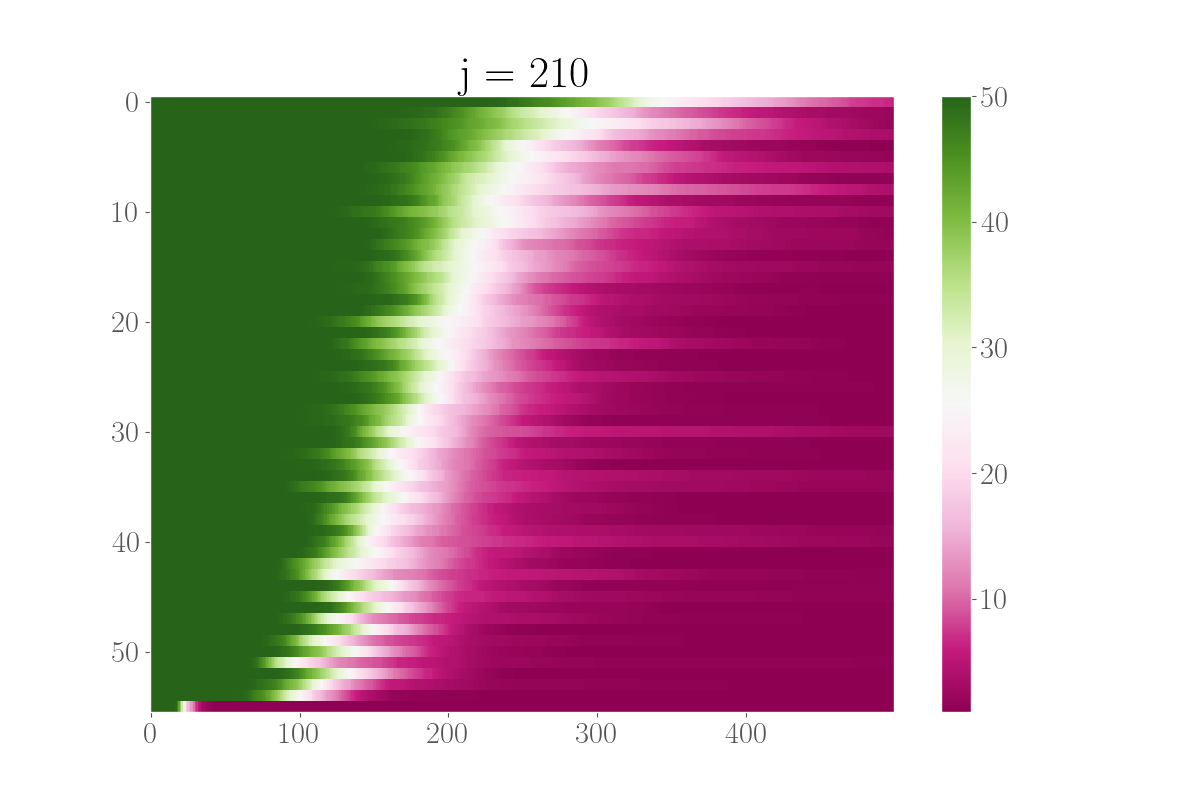

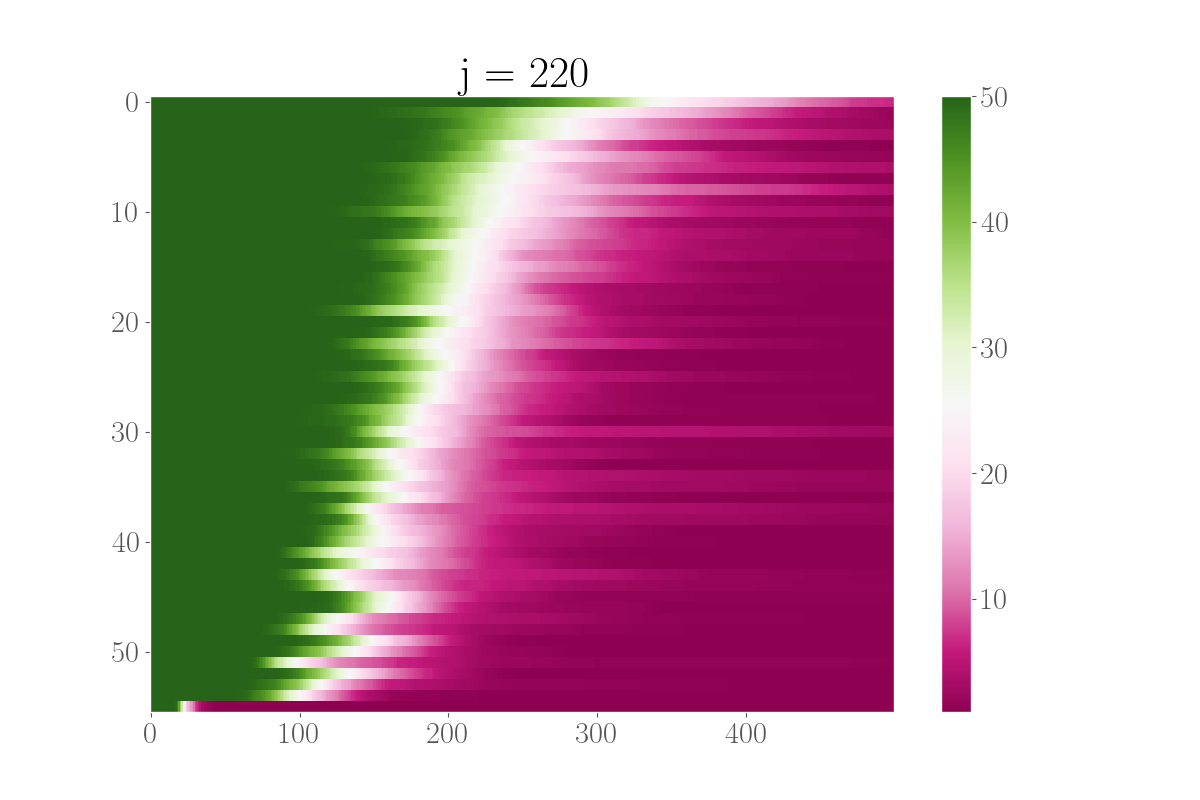

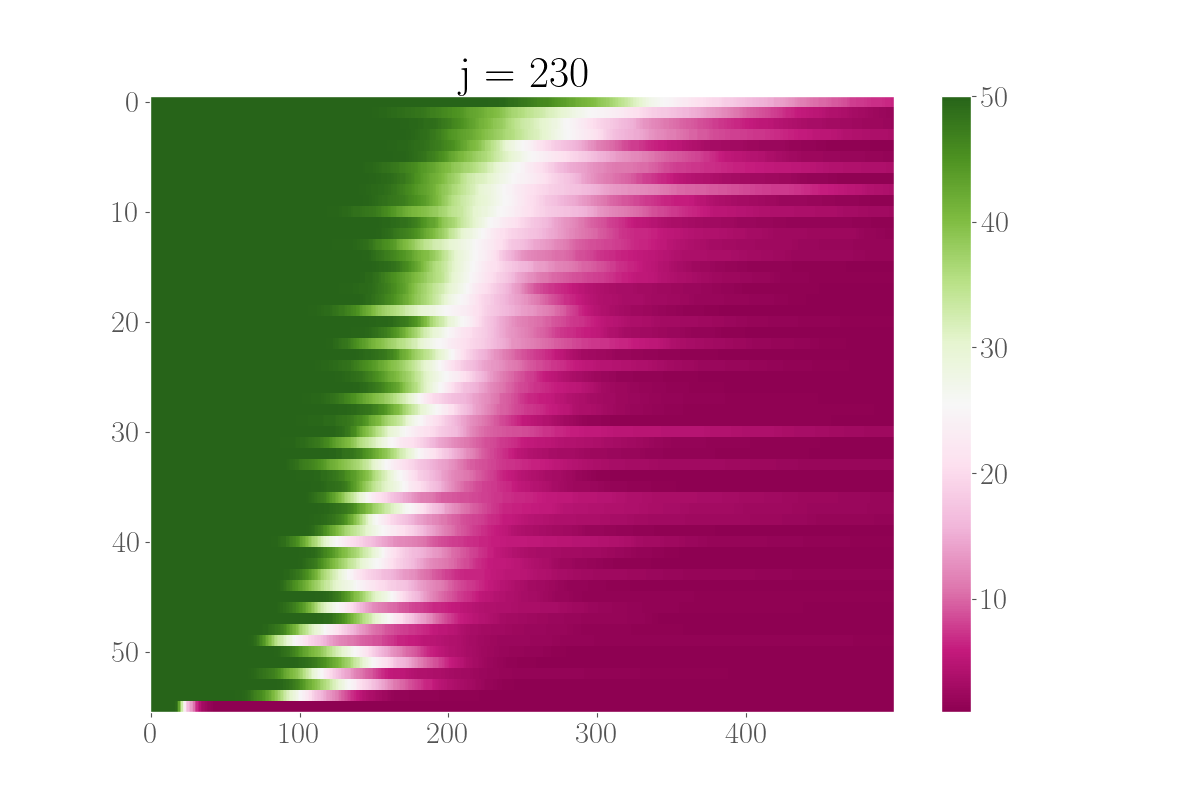

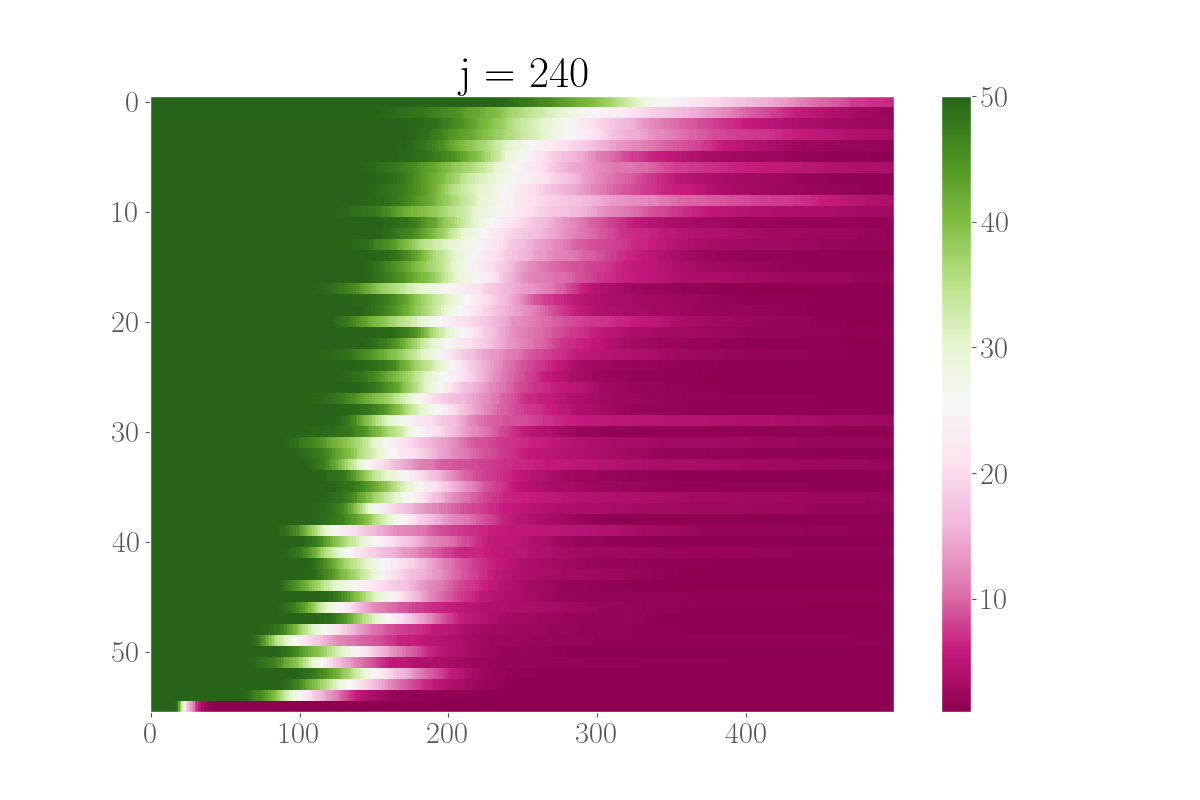

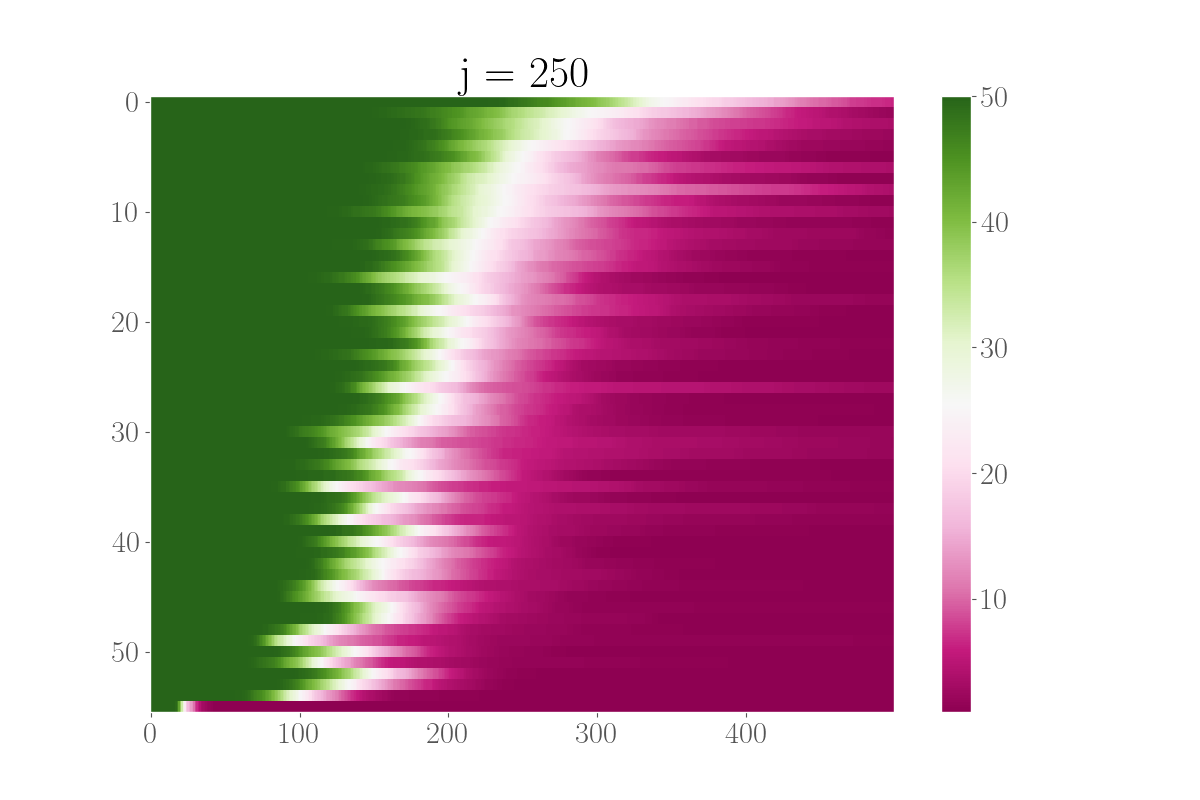

C:\Users\naomi\AppData\Local\Miniconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


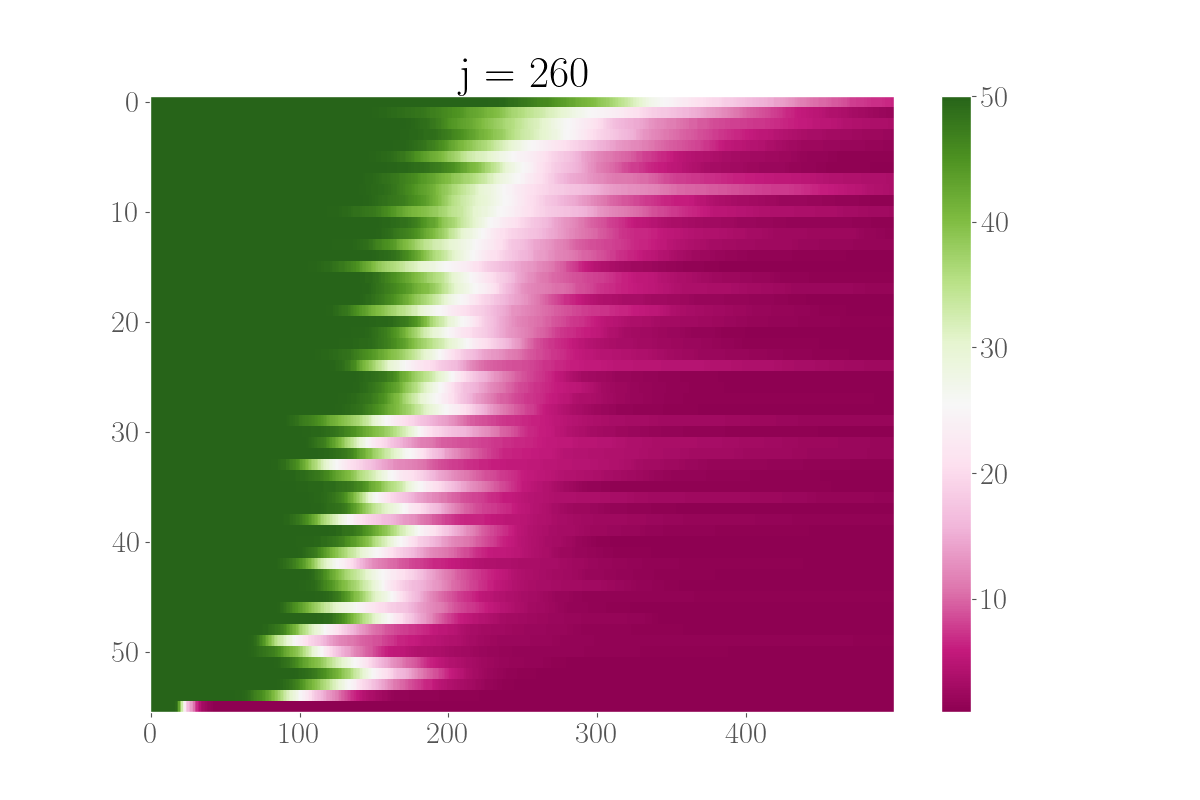

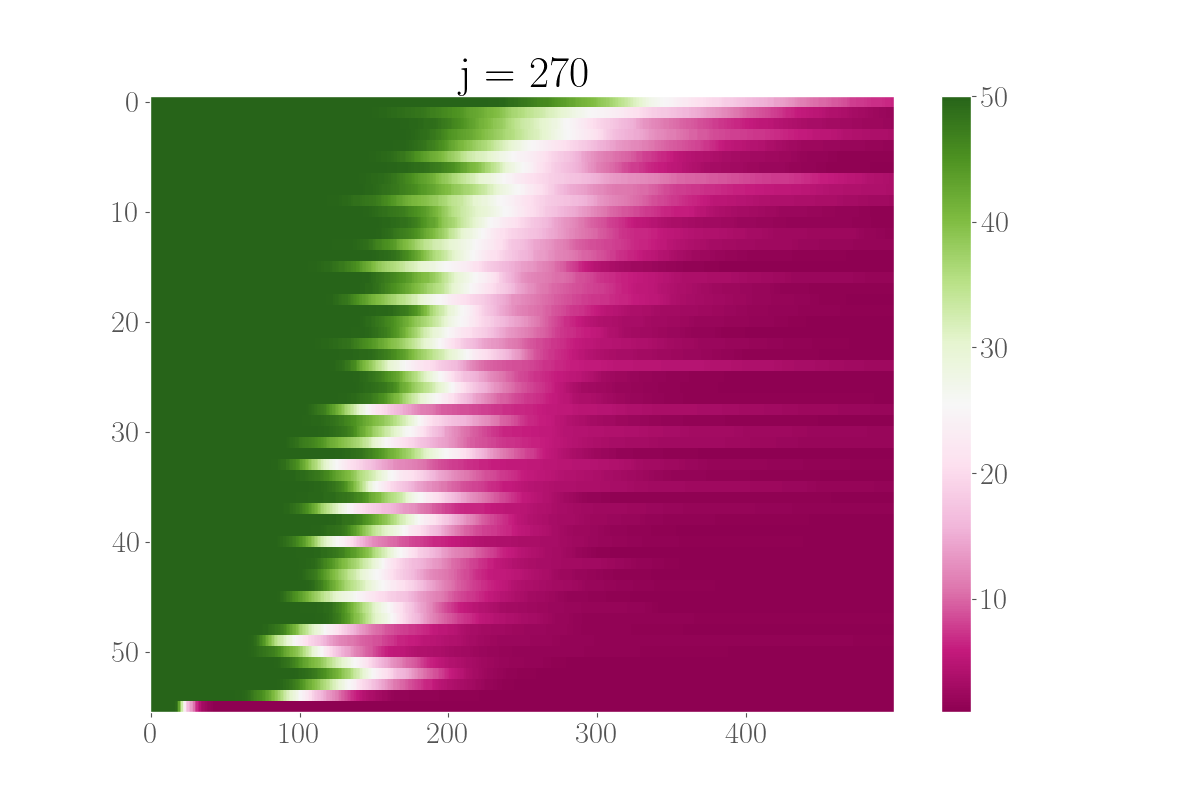

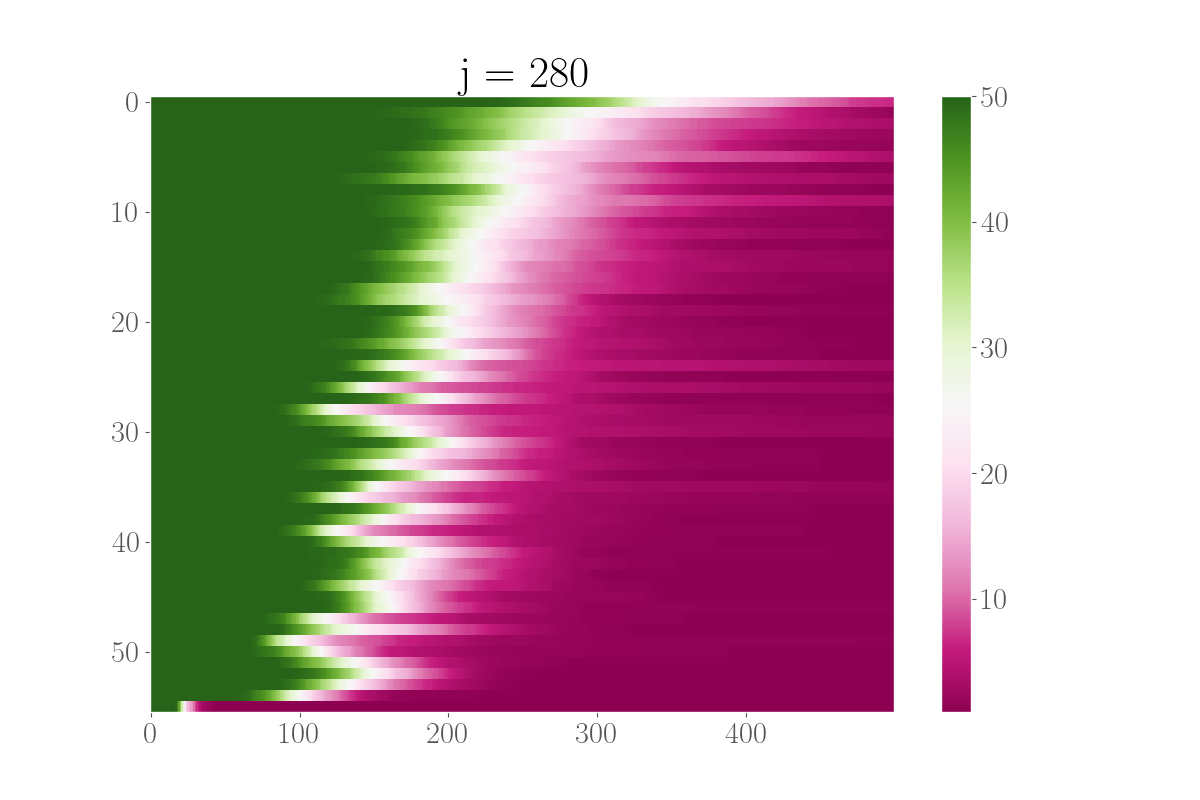

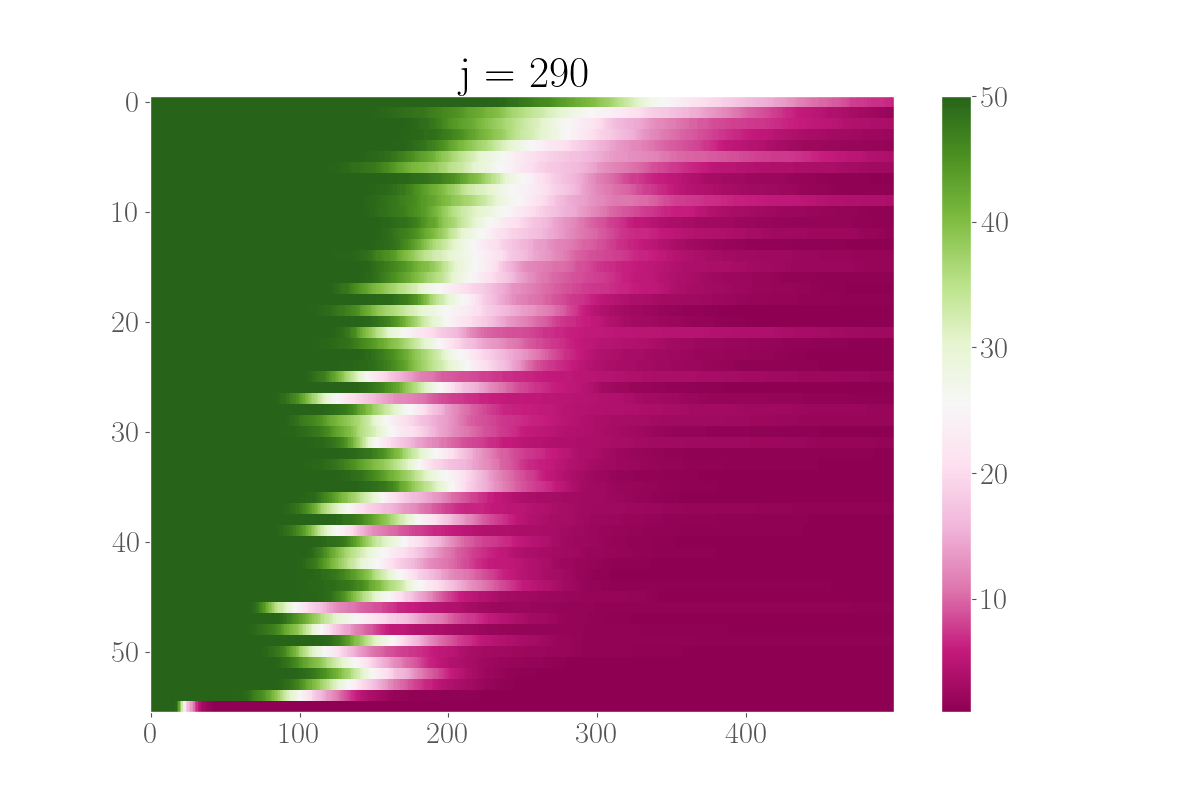

In [11]:
for j in range(100, 300, 10):
    plt.figure(figsize = (12, 8))
    plt.grid(False)
    plt.imshow(sort_df(j, df_H0), aspect='auto', interpolation='nearest', cmap = 'PiYG')
    plt.title('j = '+str(j))
    plt.colorbar()
    plt.show()